# 批量和随机梯度下降法训练

该python函数描述了两个不同的训练方法：批量训练和随机训练。对每个模型，我们使用一个回归模型来预测模型的变量。


老规矩！我都不想再翻译这段了。

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.python.framework import ops
ops.reset_default_graph()

/home/zhangxin/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
sess = tf.Session()

# 随机训练

----------------------

### 生成数据

数据是100个随机变量（服从正态分布`Normal (mean = 1, sd = 0.1)`）。目标是一个大小为100的阵列，阵列的值都为10.0。

我们为数据和目标中在计算图中创建一些必要的占位符。注意我们使用`[1]`来进行随机训练。

In [3]:
x_vals = np.random.normal(1, 0.1, 100)
y_vals = np.repeat(10., 100)

x_data = tf.placeholder(shape=[1], dtype=tf.float32)
y_target = tf.placeholder(shape=[1], dtype=tf.float32)

### 模型变量和操作

我们在计算图中创建变量`A`。我们然后创建模型运算，这里就是简单的实现输入数据和`A`的乘法。

In [4]:
# 创建变量（一个模型参数 = A）
A = tf.Variable(tf.random_normal(shape=[1]))

# 在计算图中添加运算
my_output = tf.multiply(x_data, A)

### 损失函数

对这个问题，我们使用L2损失函数。也可以使用L2损失，只需要将`tf.square()`替换为`tf.abs()`。

In [5]:
# 添加L2损失计算到计算图中
loss = tf.square(my_output - y_target)

### 优化和初始化

对于优化函数，我们选择标准梯度下降算法，学习速率为`0.02`。我们添加和运行变量初始化。

In [6]:
# 创建优化器
my_opt = tf.train.GradientDescentOptimizer(0.02)
train_step = my_opt.minimize(loss)

# 初始化变量
init = tf.global_variables_initializer()
sess.run(init)

### 训练模型

我们运行100轮训练，并且打印`A`的值，并且每5轮打印一次损失值。

In [7]:
loss_stochastic = []
# 迭代学习
for i in range(100):
    rand_index = np.random.choice(100)
    rand_x = [x_vals[rand_index]]
    rand_y = [y_vals[rand_index]]
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    if (i+1)%5==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)))
        temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
        print('Loss = ' + str(temp_loss))
        loss_stochastic.append(temp_loss)

Step #5 A = [0.3905022]
Loss = [92.330536]
Step #10 A = [2.1764958]
Loss = [64.69866]
Step #15 A = [3.6217752]
Loss = [41.544796]
Step #20 A = [4.8056393]
Loss = [28.826616]
Step #25 A = [5.7459264]
Loss = [16.882296]
Step #30 A = [6.550672]
Loss = [11.818541]
Step #35 A = [7.220478]
Loss = [9.040962]
Step #40 A = [7.697037]
Loss = [3.5392969]
Step #45 A = [8.095394]
Loss = [0.10872504]
Step #50 A = [8.467216]
Loss = [1.7390195]
Step #55 A = [8.782862]
Loss = [1.4776834]
Step #60 A = [8.901806]
Loss = [0.5146581]
Step #65 A = [9.123956]
Loss = [0.32436064]
Step #70 A = [9.24573]
Loss = [0.06781154]
Step #75 A = [9.3964615]
Loss = [1.6114722]
Step #80 A = [9.522366]
Loss = [0.53641665]
Step #85 A = [9.623475]
Loss = [0.10330757]
Step #90 A = [9.6928425]
Loss = [0.260073]
Step #95 A = [9.68282]
Loss = [0.00309679]
Step #100 A = [9.604249]
Loss = [0.73390865]


# 批量训练

------------------

我们先复位计算图

In [8]:
# 批量训练：
#　预初始化计算图
ops.reset_default_graph()
sess = tf.Session()

对于批量训练，我们需要声明我们批量尺寸大小。批量尺寸越大，优化值会更加平滑的收敛。但是如果批尺寸太大，优化算法容易陷入局部极小值，该局部极小值是非常随机的。（这是批量训练的缺点）

这里，我们可以从１到100来改变批量尺寸大小，来观察批量尺寸对收敛性的影响。并在最后画图来观察结果。

In [9]:
# 声明批量尺寸大小
batch_size = 25

### 生成数据

数据是100个随机变量（服从正态分布`Normal (mean = 1, sd = 0.1)`）。目标是一个大小为100的阵列，阵列的值都为10.0。

我们为数据和目标分别在计算图中创建必要的占位符。

这里要注意的是，我们的占位符大小为`[None, 1]`，这里的批量尺寸向`None`维度提供数据。该尺寸在计算的时候会自动填充。

In [10]:
# 创建数据
x_vals = np.random.normal(1, 0.1, 100)
y_vals = np.repeat(10., 100)
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

### 模型变量和运算

我们在计算图中创建一个变量`A`。我们然后创建一个模型运算，这里计算输入数据和`A`的乘积。

In [11]:
# 创建变量（一个模型参数 = A）
A = tf.Variable(tf.random_normal(shape=[1,1]))

# 添加到计算图
my_output = tf.matmul(x_data, A)

### 损失函数

对这个问题，我们使用L2损失函数。也可以使用L2损失，只需要将`tf.square()`替换为`tf.abs()`。

In [12]:
# 添加L2损失计算到计算图中
loss = tf.reduce_mean(tf.square(my_output - y_target))

### 优化和初始化

对于优化函数，我们选择标准梯度下降算法，学习速率为`0.02`。我们添加和运行变量初始化。

In [13]:
# 初始化变量
init = tf.global_variables_initializer()
sess.run(init)

# 创建优化器
my_opt = tf.train.GradientDescentOptimizer(0.02)
train_step = my_opt.minimize(loss)

### Train Model

我们运行100轮训练，并且打印`A`的值，并且每5轮打印一次损失值。

注意我们选择一个数据的批尺寸，而不是使用一个输入数据点。

In [14]:
loss_batch = []
# 循环
for i in range(100):
    rand_index = np.random.choice(100, size=batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    if (i+1)%5==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)))
        temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
        print('Loss = ' + str(temp_loss))
        loss_batch.append(temp_loss)

Step #5 A = [[0.4877887]]
Loss = 90.90049
Step #10 A = [[2.2141042]]
Loss = 60.700226
Step #15 A = [[3.6370745]]
Loss = 41.452988
Step #20 A = [[4.7955375]]
Loss = 28.903606
Step #25 A = [[5.7470975]]
Loss = 19.01532
Step #30 A = [[6.5249443]]
Loss = 13.304721
Step #35 A = [[7.1576147]]
Loss = 7.6217775
Step #40 A = [[7.684753]]
Loss = 5.467272
Step #45 A = [[8.10994]]
Loss = 4.4773912
Step #50 A = [[8.458442]]
Loss = 3.6229844
Step #55 A = [[8.725804]]
Loss = 2.7610083
Step #60 A = [[8.953627]]
Loss = 2.155571
Step #65 A = [[9.151736]]
Loss = 1.6686602
Step #70 A = [[9.28768]]
Loss = 1.7209245
Step #75 A = [[9.410691]]
Loss = 1.3108222
Step #80 A = [[9.511323]]
Loss = 1.013826
Step #85 A = [[9.600161]]
Loss = 1.0996922
Step #90 A = [[9.663177]]
Loss = 1.670001
Step #95 A = [[9.738412]]
Loss = 1.9581314
Step #100 A = [[9.794629]]
Loss = 1.232656


# 打印随机训练和批量训练的训练过程

这里使用matplotlib代码来显示损失值。

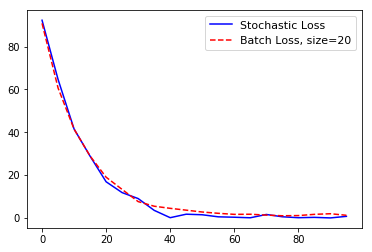

In [15]:
plt.plot(range(0, 100, 5), loss_stochastic, 'b-', label='Stochastic Loss')
plt.plot(range(0, 100, 5), loss_batch, 'r--', label='Batch Loss, size=20')
plt.legend(loc='upper right', prop={'size': 11})
plt.show()